##Data Exploration Projekt

In [49]:
# Download and import of German Stopwords, execution only needed once
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [50]:
# All necessary imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from langdetect import detect
from ast import literal_eval
from fuzzywuzzy import fuzz

In [51]:
# Loading synonyms into a dataframe
kode = pd.read_excel("kode_data.xlsx", header=1)

# Keep one of the df commented:

# Reading full dataset into dataframe
df = pd.read_csv('jobs.csv', encoding='UTF-8')

# Reading sample dataset into dataframe
# df = pd.read_excel("jobs_sample.xlsx")


In [52]:
# group jobs
jobtitle_df = df['company'].value_counts()
print(jobtitle_df.head(21))

Presented by Hotelcareer                    13445
Deutsche Bahn AG                             8454
Presented by GASTROJOBS                      3674
HAPEKO Hanseatisches Personalkontor GmbH     2963
FERCHAU GmbH                                 2443
Presented by meinestadt.de                   2389
Mercedes - Benz AG                           1901
ZEISS                                        1854
BWI GmbH                                     1721
Bosch Gruppe                                 1716
Hays – Recruiting Experts Worldwide          1526
DIS AG                                       1438
Amazon Europe Core                           1432
Brunel GmbH                                  1427
Lidl Stiftung & Co. KG                       1344
Ratbacher GmbH                               1274
BAUHAUS                                      1205
Deloitte                                     1167
Amadeus FiRe AG                              1133
Schwarz Dienstleistungen                      934


In [53]:
# Analyzing kode words for similarity
syn_list = []
syn_arr = np.zeros(shape=(308,308))

for i in range(64):
    for word in literal_eval(kode['syn'][i]):
        syn_list.append(word)

for word in syn_list:
    for comp in syn_list:
        ratio = []
        ratio.append(fuzz.ratio(word.lower(), comp.lower()))
        ratio.append(fuzz.partial_ratio(word.lower(), comp.lower()))
        ratio.append(fuzz.token_sort_ratio(word.lower(), comp.lower()))
        ratio.append(fuzz.token_set_ratio(word.lower(), comp.lower()))
        # syn_arr[syn_list.index(word)][syn_list.index(comp)] = ratio
        if 100 > ratio[2] > 85:
            print(word, comp, ratio)

# print(len(syn_list))
# print(syn_arr)
# print(syn_list[292], syn_list[293], syn_list[294])

konsequenzen konsequenz [91, 100, 91, 91]
ehrlichkeit beharrlichkeit [88, 82, 88, 88]
handlungsspielraum handlungsspielräume [95, 94, 95, 95]
handlungsspielräume handlungsspielraum [95, 94, 95, 95]
freundlichkeit gründlichkeit [86, 86, 86, 86]
lernfähigkeit lehrfähigkeit [93, 93, 93, 93]
anteilnahme anteilsnahme [96, 91, 96, 96]
anteilsnahme anteilnahme [96, 91, 96, 96]
mitarbeiterförderung mitarbeiter förderung [98, 95, 88, 88]
mitarbeiter förderung mitarbeiterförderung [98, 95, 88, 88]
beharrlichkeit ehrlichkeit [88, 82, 88, 88]
konsequenz konsequenzen [91, 100, 91, 91]
integrationsfähigkeit interaktionsfähigkeit [95, 95, 95, 95]
analytische fähigkeit analytische fähigkeiten [96, 100, 96, 96]
analytische fähigkeiten analytische fähigkeit [96, 100, 96, 96]
sachorientierung fachorientierung [94, 94, 94, 94]
faktenorientierung marktorientierung [86, 88, 86, 86]
urteilfähigkeit urteilsfähigkeit [97, 94, 97, 97]
urteilsfähigkeit urteilfähigkeit [97, 94, 97, 97]
kooperat

In [54]:
# from pymongo import MongoClient

# client = MongoClient()
# db = client.mlproject

# stellenanz = db.stellenanz
# stellenanz.insert_many(df.to_dict('records'))

# sample = db["job_sample"]
# sample.insert_many(df.to_dict('records'))



In [55]:
# Preparing all neccessary components
r64 = range(64)
arr = np.zeros(shape=(8,8))
stop_words = set(stopwords.words('german'))
synonyms = [(syn, i)    for i in r64 
                        for syn in literal_eval(kode['syn'][i])]
                        

# Function to count frequency of words in column and tokenize
def countall(col, lang:bool = False): # lang: True to check for language
    wcnt = Counter()
    for row in col:
        # if type(row) == str and detect(row) == 'de': # lang == True and 
        try:
            tokens = word_tokenize(row, language="german")
            words = [w.lower()  for w in tokens
                        if not w.lower() in stop_words]
            wcnt.update(words)
        except:
            pass
            # elif lang == False:
            #     tokens = word_tokenize(row)
            #     words = [w   for w in tokens
            #                     if not w.lower() in stop_words]
            #     wcnt.update(words)
            # except:
            #     pass 

    return wcnt

wcnt = countall(df['profile'], True)
# v = countall(df['title'])

# print(w.items()[0])

In [56]:
# import csv

# a_file = open("jobtitle_count3.csv", "w", encoding="utf8")

# writer = csv.writer(a_file)
# for key, value in w.most_common():
#     writer.writerow([key, value])

# a_file.close()

In [57]:

def synsyn(wcnt):
    dcnt = {i:0 for i in r64} # dict to count synonym value into
    for syn in synonyms:
        sylen = len(syn[0])
        for word in wcnt.keys(): 
            wlen = len(word)
            wlen_ul = wlen + 4
            wlen_ll = wlen - 3
            if wlen_ll <= sylen <= wlen_ul:
                ratio = fuzz.ratio(word.lower(), syn[0])
                if ratio > 80:
                    dcnt[syn[1]] += wcnt[word]
                    del wcnt[word]
                    break
            

    return dcnt

d = synsyn(wcnt)
        

In [58]:
arr = np.zeros(shape=(8,8))
for i in r64:
    x,y = literal_eval(kode['coord'][i])
    arr[x-1][y-1] = d[i]

print(arr)

[[4.13100e+03 4.18150e+04 3.53620e+04 7.54000e+02 2.92000e+04 6.25000e+02
  2.02900e+03 5.56900e+04]
 [1.77600e+03 9.25100e+03 1.27440e+04 1.25608e+05 1.13800e+03 3.06560e+04
  2.90000e+01 3.59170e+04]
 [1.49960e+04 1.93800e+03 5.34940e+04 0.00000e+00 5.28800e+03 3.18700e+03
  4.86000e+02 2.98600e+03]
 [3.11400e+03 4.70000e+01 1.12600e+03 3.42820e+04 1.27000e+02 1.24000e+02
  1.17700e+04 1.27300e+03]
 [5.85000e+02 4.60000e+02 2.50000e+01 1.08800e+03 3.34000e+02 3.46000e+03
  3.77000e+02 2.26100e+04]
 [1.18992e+05 1.95020e+04 1.91800e+03 5.08500e+03 5.86000e+02 2.94000e+02
  1.27547e+05 2.20000e+01]
 [4.87320e+04 3.03400e+03 3.94000e+02 3.56500e+03 1.96730e+04 2.40000e+01
  2.55342e+05 1.55000e+03]
 [1.22300e+03 9.00900e+03 5.50000e+01 9.93300e+03 3.25900e+03 1.53000e+02
  2.23000e+02 9.96000e+02]]


In [59]:
ratio = fuzz.token_sort_ratio("Experten", "hallexperten")
hilfe = [7, 12, 18, 32]
print(ratio)

80


In [60]:
# start = time.time()
# d = countall()
# end = time.time()

# print(f"\nDuration: {np.round((end - start), 3)}s")

In [61]:
import multiprocessing as mp

print("Number of processors:", mp.cpu_count())

Number of processors: 8


<AxesSubplot:>

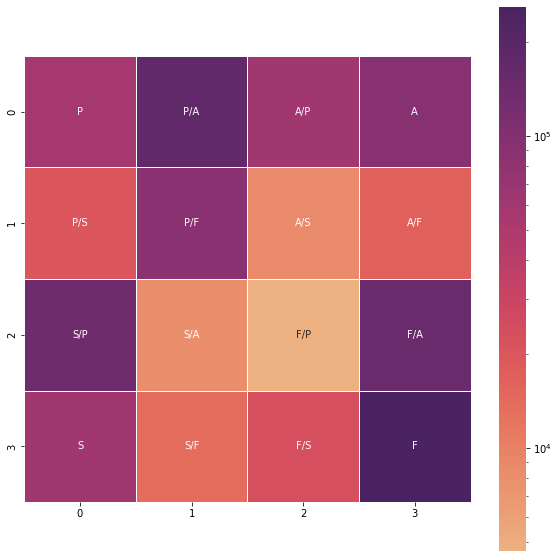

In [73]:
import seaborn as sns
plt.figure(figsize=(10,10))

def coarser(arra):
    cache = []
    result = []
    for j in range(8):
        cache.append([arra[j][i]+arra[j][i+1] for i in range(0, 8, 2)])

    for n in range(0, 8, 2):
        result.append([sum(k) for k in zip(cache[n], cache[n+1])])
        
    return np.array(result)

goho = coarser(arr)
labels = np.array(
    [['P', 'P/A', 'A/P', 'A'],
    ['P/S', 'P/F', 'A/S', 'A/F'],
    ['S/P', 'S/A', 'F/P', 'F/A'],
    ['S', 'S/F', 'F/S', 'F']])
    
sns.heatmap(goho, annot=labels, fmt = '', linewidths=1, linecolor='w', square=True, norm=LogNorm(), cmap='flare')

<AxesSubplot:>

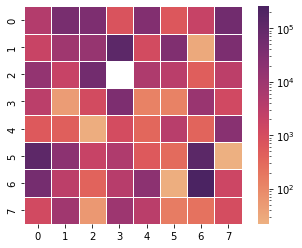

In [67]:

sns.heatmap(arr, linewidths=1, linecolor='w', square=True, norm=LogNorm(), cmap='flare')

<AxesSubplot:xlabel='freq'>

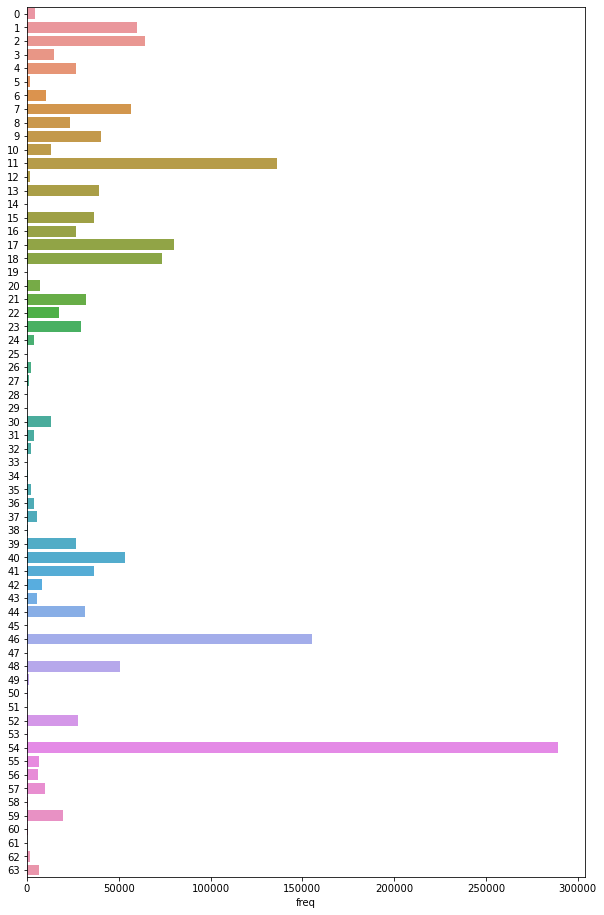

In [72]:
arrdf = pd.DataFrame(arr.flatten(), columns=['freq'])

plt.figure(figsize=(10,16))
sns.barplot(y=arrdf.index, x=arrdf.freq, orient='h')